In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap
import mpl_toolkits.basemap.pyproj as pyproj
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
import numpy as np
sns.set(color_codes=True)
%matplotlib inline

In [2]:
data = pd.read_excel(r'../data/TNC_time_transit_with distance.xlsx')
data.head()

,FID,id_match,month,day_of_week,starting_lng,starting_lat,dest_lng,dest_lat,tmpdata_row,metro_o,...,distance,begin_time,finish_time,start_clock,start_hour,end_clock,end_hour,travel time,begin_date,finish_date
0,0,100001,1,5,121.469216,31.258199,121.422554,31.256178,1,1,...,4.441128,2015-01-05 15:34:13,2015-01-05 16:02:18,15:34:13,15.570278,16:02:18,16.038333,28.083333,2015-01-05 15:34:13,2015-01-05 16:02:18
1,1,100002,1,5,121.456870,31.243510,121.430527,31.203091,2,0,...,5.145304,2015-01-05 11:49:58,2015-01-05 12:03:03,11:49:58,11.832778,12:03:03,12.050833,13.083333,2015-01-05 11:49:58,2015-01-05 12:03:03
2,2,100003,1,6,121.563579,31.205329,121.550903,31.208225,3,1,...,1.247823,2015-01-06 17:08:58,2015-01-06 17:13:48,17:08:58,17.149444,17:13:48,17.230000,4.833333,2015-01-06 17:08:58,2015-01-06 17:13:48
3,3,100004,1,4,121.409320,31.277272,121.390427,31.268612,4,0,...,2.037481,2015-01-04 08:55:49,2015-01-04 09:02:06,08:55:49,8.930278,09:02:06,9.035000,6.283333,2015-01-04 08:55:49,2015-01-04 09:02:06
4,4,100005,1,6,121.410744,31.169126,121.495757,31.213364,5,0,...,9.465133,2015-01-06 19:48:15,2015-01-06 20:15:22,19:48:15,19.804167,20:15:22,20.256111,27.116667,2015-01-06 19:48:15,2015-01-06 20:15:22


In [90]:
#reportject data
wgs84=pyproj.Proj("+init=EPSG:4326")
UTM = pyproj.Proj("+init=EPSG:2385")


(634165.7810927816, 3450012.881966493)

In [4]:
weight = pd.read_excel(r'../data/TNC_panel_weight.xlsx')
weight.index = weight['month']
weight['share_adjusted'] = weight['share (Jan=1)']/weight['share (Jan=1)'].max()
weight

,month,share (Jan=1),share_adjusted
month,,,
1,1,1.0,0.243902
2,2,0.9,0.219512
3,3,1.7,0.414634
4,4,2.1,0.512195
5,5,2.4,0.585366
6,6,3.1,0.756098
7,7,4.1,1.000000
8,8,2.8,0.682927
9,9,2.5,0.609756


In [5]:
def resample(original_data, weight, month):
#     original_data: the original DiDi data we get;
#     weight: the weight for resample the data;
#     the month we want do the resampling
    sub_data = original_data[original_data['month']==month]
    sample = sub_data.sample(frac = float((weight.loc[month,'share_adjusted'])), replace=False,random_state=1)
    return sample

In [6]:
data_re = pd.DataFrame()
for i in range(1,11):
    data_re = data_re.append(resample(data,weight,i))
data_re.head()

,FID,id_match,month,day_of_week,starting_lng,starting_lat,dest_lng,dest_lat,tmpdata_row,metro_o,...,distance,begin_time,finish_time,start_clock,start_hour,end_clock,end_hour,travel time,begin_date,finish_date
21492,21492,121493,1,6,121.407162,31.164013,121.398444,31.203106,21493,0,...,4.425348,2015-01-06 19:58:17,2015-01-06 20:13:11,19:58:17,19.971389,20:13:11,20.219722,14.900000,2015-01-06 19:58:17,2015-01-06 20:13:11
9488,9488,109489,1,5,121.486184,31.204386,121.456390,31.201424,9489,1,...,2.852761,2015-01-05 14:41:19,2015-01-05 14:53:52,14:41:19,14.688611,14:53:52,14.897778,12.550000,2015-01-05 14:41:19,2015-01-05 14:53:52
16933,16933,116934,1,1,121.494585,31.245437,121.463608,31.210981,16934,1,...,4.832655,2015-01-01 01:01:31,2015-01-01 01:26:48,01:01:31,1.025278,01:26:48,1.446667,25.283333,2015-01-01 01:01:31,2015-01-01 01:26:48
12604,12604,112605,1,6,121.399155,31.198053,121.358284,31.217976,12605,0,...,4.473979,2015-01-06 18:49:08,2015-01-06 19:24:38,18:49:08,18.818889,19:24:38,19.410556,35.500000,2015-01-06 18:49:08,2015-01-06 19:24:38
8222,8222,108223,1,1,121.480010,31.225719,121.458138,31.215656,8223,1,...,2.361734,2015-01-01 22:12:03,2015-01-01 22:22:46,22:12:03,22.200833,22:22:46,22.379444,10.716667,2015-01-01 22:12:03,2015-01-01 22:22:46


In [118]:
data_re['dest_xx'],data_re['dest_yy'] = pyproj.transform(wgs84, UTM, data_re['dest_lng'].as_matrix(),data_re['dest_lat'].as_matrix())
data_re['starting_xx'],data_re['starting_yy'] = pyproj.transform(wgs84, UTM, data_re['starting_lng'].as_matrix(),data_re['starting_lat'].as_matrix())
data_re.head()
len(data_re.index)

140854

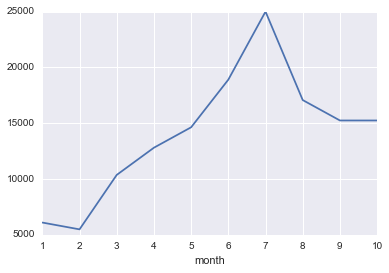

In [7]:
data_re.groupby('month').count()['FID'].plot()
data_re.to_csv(r'../data/TNC_time_transit_with distance_resample.csv')

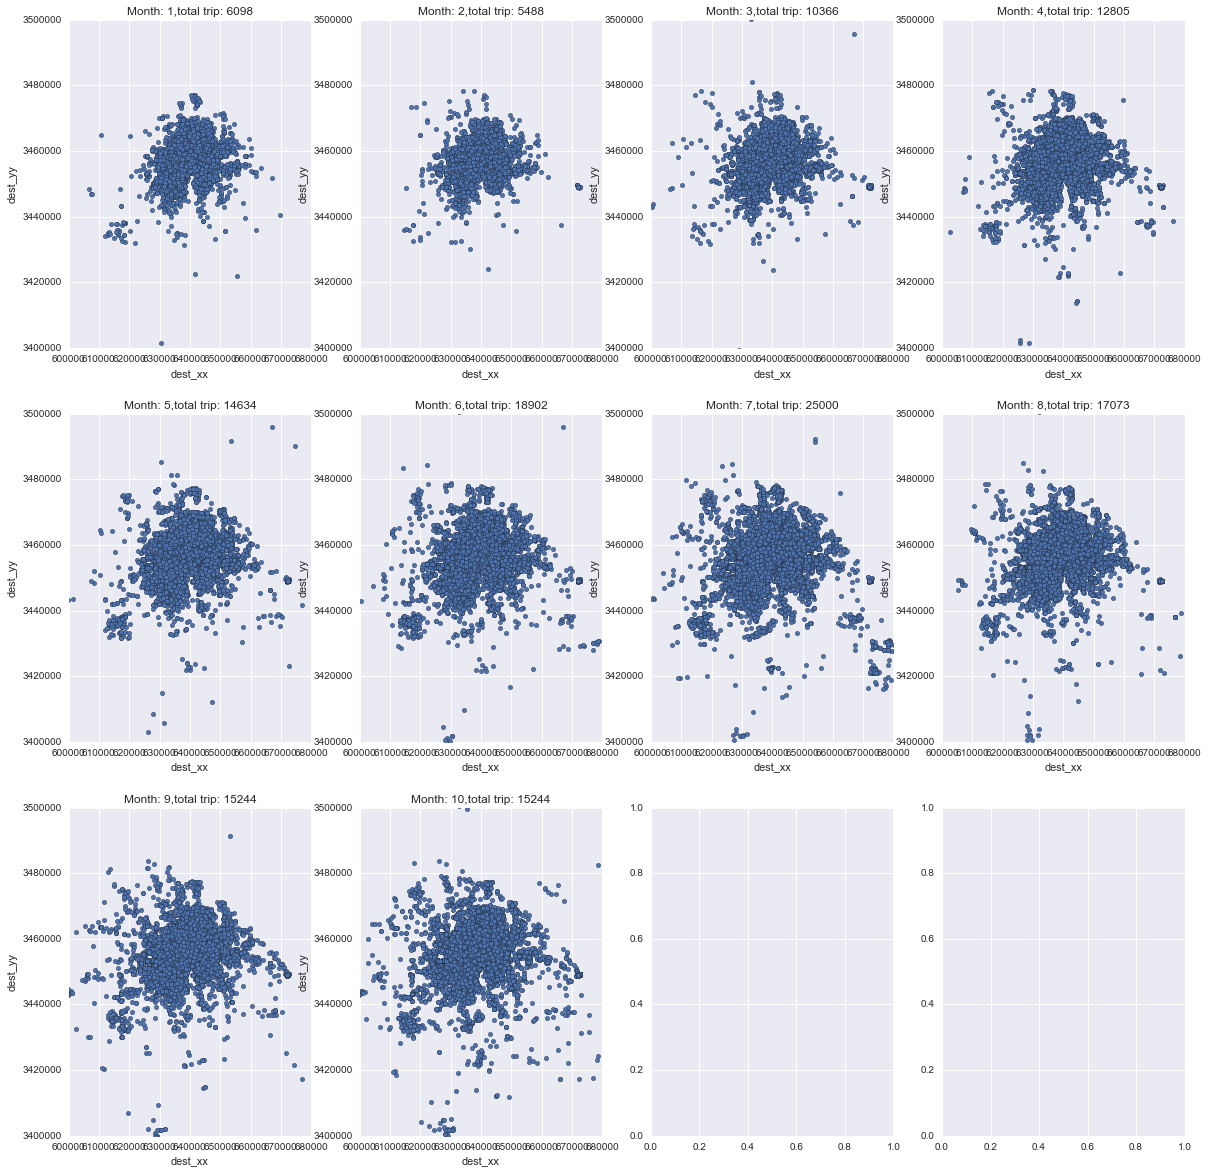

In [139]:
fig, axes = plt.subplots(nrows=3, ncols=4,figsize=(20,20))
for i in range(1,11):
    
#     ax = data_re[data_re['month']==i].plot(x= 'dest_lng',y = 'dest_lat',kind = 'scatter',figsize = (5,10))
    ax = data_re[data_re['month']==i].plot(x="dest_xx", y="dest_yy",kind="scatter",ax = axes[int((i-1)/4),(i-1)%4]);
    data_re[data_re['month']==i].to_csv(r'../data/resampled_%s.csv'%i)
    ax.set_title('Month: %s,total trip: %s'%(i,len(data_re[data_re['month']==i].index)))
    ax.set_xlim(600000, 680000)
    ax.set_ylim(3400000,3500000)


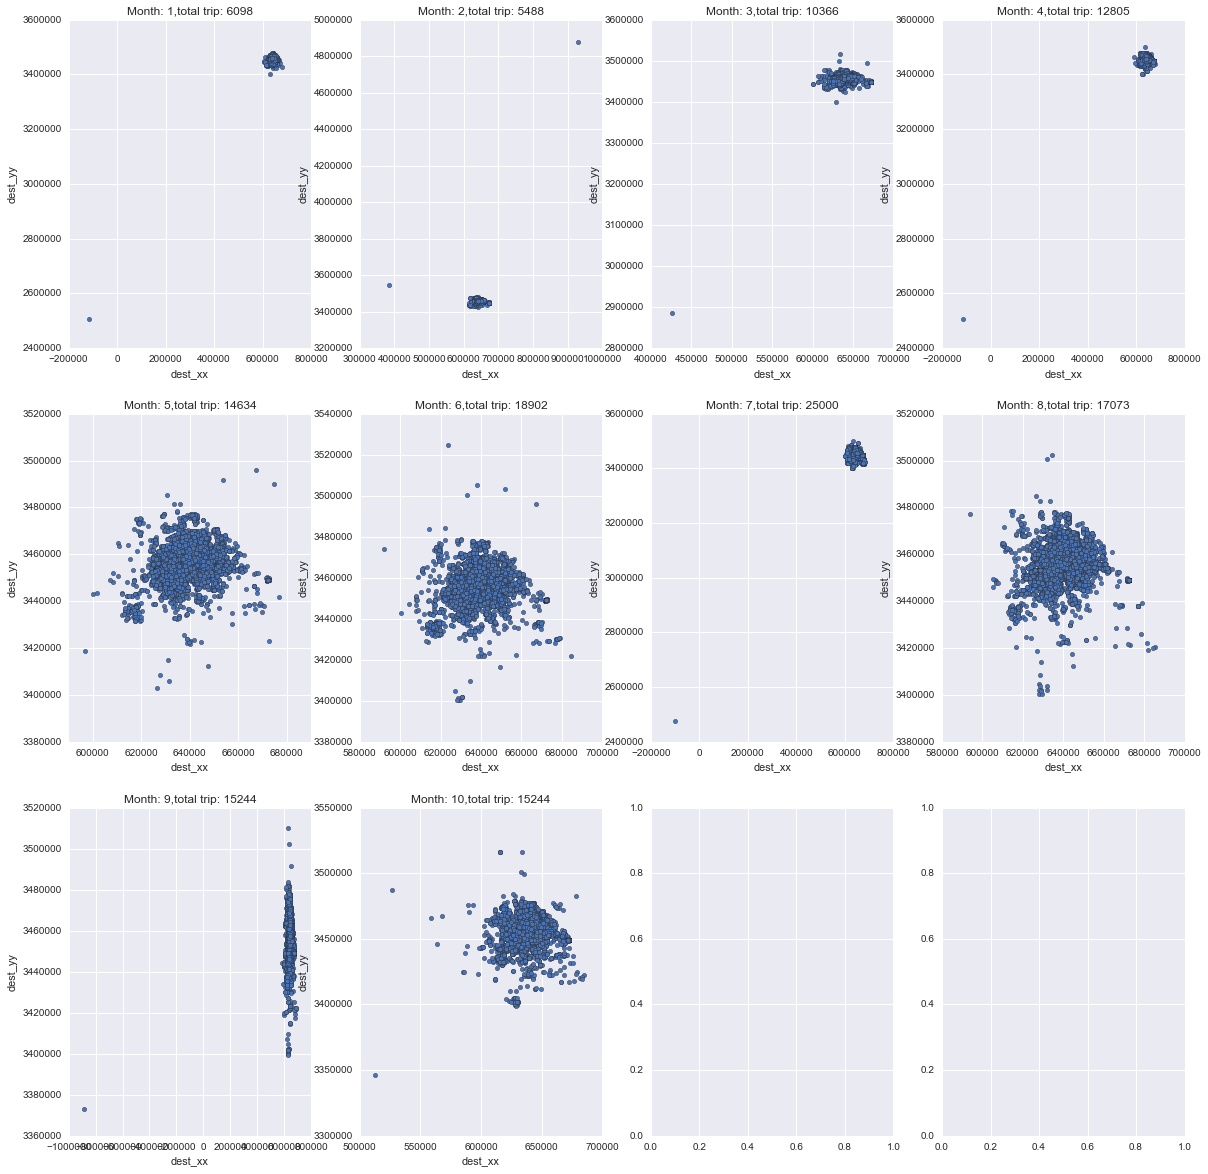

In [102]:
fig, axes = plt.subplots(nrows=3, ncols=4,figsize=(20,20))
for i in range(1,11):
    
#     ax = data_re[data_re['month']==i].plot(x= 'dest_lng',y = 'dest_lat',kind = 'scatter',figsize = (5,10))
    ax = data_re[data_re['month']==i].plot(x="dest_xx", y="dest_yy",kind="scatter",ax = axes[int((i-1)/4),(i-1)%4]);
    ax.set_title('Month: %s,total trip: %s'%(i,len(data_re[data_re['month']==i].index)))

In [105]:
sub = data_re[data_re['month']==1]
sub.head()

,FID,id_match,month,day_of_week,starting_lng,starting_lat,dest_lng,dest_lat,tmpdata_row,metro_o,...,start_hour,end_clock,end_hour,travel time,begin_date,finish_date,dest_xx,dest_yy,starting_xx,starting_yy
21492,21492,121493,1,6,121.407162,31.164013,121.398444,31.203106,21493,0,...,19.971389,20:13:11,20.219722,14.900000,2015-01-06 19:58:17,2015-01-06 20:13:11,633279.691491,3454337.296290,634165.781093,3450012.881966
9488,9488,109489,1,5,121.486184,31.204386,121.456390,31.201424,9489,1,...,14.688611,14:53:52,14.897778,12.550000,2015-01-05 14:41:19,2015-01-05 14:53:52,638805.276650,3454222.080772,641640.755653,3454588.325301
16933,16933,116934,1,1,121.494585,31.245437,121.463608,31.210981,16934,1,...,1.025278,01:26:48,1.446667,25.283333,2015-01-01 01:01:31,2015-01-01 01:26:48,639479.248300,3455290.940158,642379.925657,3459151.304367
12604,12604,112605,1,6,121.399155,31.198053,121.358284,31.217976,12605,0,...,18.818889,19:24:38,19.410556,35.500000,2015-01-06 18:49:08,2015-01-06 19:24:38,629431.615266,3455938.479563,633354.549795,3453777.834504
8222,8222,108223,1,1,121.480010,31.225719,121.458138,31.215656,8223,1,...,22.200833,22:22:46,22.379444,10.716667,2015-01-01 22:12:03,2015-01-01 22:22:46,638951.075856,3455802.461066,641020.605697,3456946.058040


array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 17

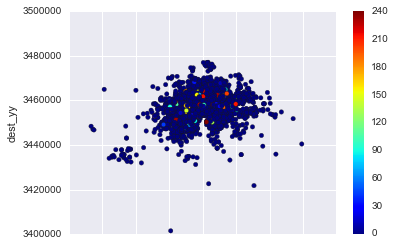

In [147]:
db = DBSCAN(eps=1, min_samples=3).fit(sub[['dest_xx','dest_yy']].as_matrix())
k_means = KMeans(init='k-means++', n_clusters=2, n_init=10)
k_means.fit(sub[['dest_xx','dest_yy']].as_matrix())
k_means_labels = k_means.labels_
k_means_labels_unique = np.unique(k_means_labels)

ax = sub.plot(x='dest_xx',y='dest_yy',c= db.labels_,kind='scatter',colormap='jet')
ax.set_xlim(600000, 680000)
ax.set_ylim(3400000,3500000)
np.unique(db.labels_)

(3400000, 3500000)

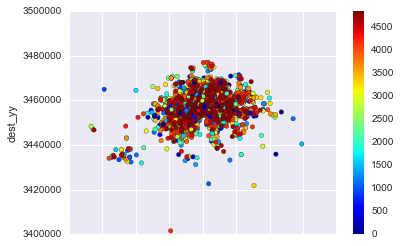